In [1]:
import pandas as pd            # 파이썬에서 자료 정제 및 분석                   
from sklearn.model_selection import train_test_split     
from keras.models import Sequential 
from keras.layers import Dense 
from keras import optimizers 
import numpy as np 
import tensorflow as tf

In [4]:
data = pd.read_csv('iris.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
# 중복을 허용하지 않고 있는 데이터의 종류를 출력
print("품종 종류:", data["variety"].unique())

# 라벨을 정수로 인덱싱
data['variety'] = data['variety'].replace(['Virginica','Setosa','Versicolor'],[0,1,2])
print("품종 종류:", data["variety"].unique())

품종 종류: ['Setosa' 'Versicolor' 'Virginica']
품종 종류: [1 2 0]


In [7]:
# 입력 및 라벨 데이터
data_X = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values 
data_y = data['variety'].values

In [8]:
# 학습 및 테스트 데이터
(train_X, test_X, train_Y, test_Y) = train_test_split(data_X, data_y, train_size=0.8)

In [9]:
from keras.utils import to_categorical
#  학습 및 테스트 데이터 원-핫 인코딩
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [10]:
model= Sequential()
#model.add(Dense(3, input_dim=4, activation='softmax'))
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()  


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 403 (1.57 KB)
Trainable params: 403 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer = optimizers.SGD(0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_X, train_Y, 
                    epochs = 100, batch_size = 1,  
                    validation_data=(test_X, test_Y))

Epoch 1/100


120/120 [==============================] - 1s 4ms/step - loss: 0.7868 - accuracy: 0.6667 - val_loss: 0.3771 - val_accuracy: 0.9333
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.8167 - val_loss: 0.2748 - val_accuracy: 0.9000
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3709 - accuracy: 0.8250 - val_loss: 0.1964 - val_accuracy: 0.9333
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8500 - val_loss: 0.1869 - val_accuracy: 0.9667
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8417 - val_loss: 0.2793 - val_accuracy: 0.8667
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8583 - val_loss: 0.1244 - val_accuracy: 0.9667
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.8917 - val_loss: 0.2903 - val_accuracy: 0.86

Epoch 55/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1409 - accuracy: 0.9417 - val_loss: 0.1029 - val_accuracy: 0.9667
Epoch 56/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9500 - val_loss: 0.0888 - val_accuracy: 0.9333
Epoch 57/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9583 - val_loss: 0.1012 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9667 - val_loss: 0.3019 - val_accuracy: 0.9000
Epoch 59/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9500 - val_loss: 0.1832 - val_accuracy: 0.9667
Epoch 60/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9250 - val_loss: 0.1041 - val_accuracy: 0.9333
Epoch 61/100
120/120 [==============================] - 0s 3ms/step - loss: 0.1038 - accuracy: 0.9667 - val_loss: 0.1671 - val_accuracy:

In [13]:
model.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 148ms/step - loss: 0.1443 - accuracy: 0.9667


[0.1443457156419754, 0.9666666388511658]

In [14]:
predit = model.predict(test_X)
#for i in range(0,len(predit)) :
#    print("예측값 : ", predit[i], "\t실제값 : ", test_Y[i])
print(predit[0:5])    # 예측 결과
print(test_Y[0:5])    # 라벨

1/1 [==============================] - 0s 115ms/step
[[9.3190060e-11 9.9929273e-01 7.0727797e-04]
 [3.5497948e-12 9.9980789e-01 1.9214176e-04]
 [3.4244994e-12 9.9976403e-01 2.3593349e-04]
 [9.9867094e-01 2.5666004e-08 1.3291050e-03]
 [9.9907011e-01 2.6075533e-08 9.2992262e-04]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


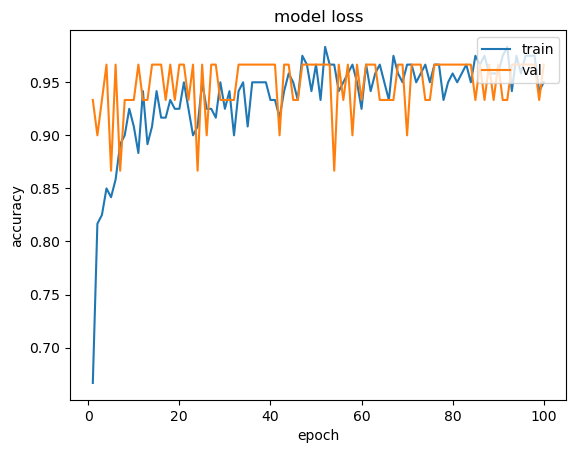

In [15]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
